# Definiendo diferencias entre distribuciones

## Effect size

Vamos a generar dos series de datos sintéticos, que expresan alturas para dos grupos distintos: mujeres y hombres.
Los datos serán generados con una distribución normal, y calcularemos la distribución de probabilidad.

Una vez generada la información querremos analizar cómo de diferentes son ambas distribuciones. Para ello 

In [1]:
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# seed the random number generator so we all get the same results
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

## Parte 1

Para explorar los estadísticos y cuantificar el tamaño del efecto, *effect size*, vamos a ver la diferencia de alturas entre hombres y mujeres.

In [2]:
mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1)

In [3]:
mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

La siguiente función evalua la función densidad de probabilidad de una distribución normal.

In [4]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

Representación de las distribuciones de probabilidad de ambas distribuciones de datos.

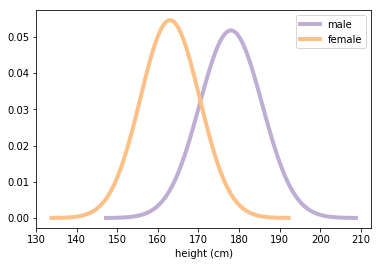

In [5]:
xs, ys = eval_pdf(male_height)
pyplot.plot(xs, ys, label='male', linewidth=4, color=COLOR2)

xs, ys = eval_pdf(female_height)
pyplot.plot(xs, ys, label='female', linewidth=4, color=COLOR3)
pyplot.xlabel('height (cm)')
pyplot.legend()
pyplot.show()

Asumamos por ahora que dichas distribuciones son cierta para la población general.

Ahora vamos a usar el método `rvs` para generar muestras aleatorias procedentes de la población (la distribución anterior).  Vea que es un proceso totalmente aleatorio.

In [6]:
male_sample = male_height.rvs(1000)
female_sample = female_height.rvs(1000)

Both samples are NumPy arrays. Now we can compute sample statistics like the mean and standard deviation.

In [7]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.16511665818112, 7.84199617128995)

The sample mean is close to the population mean, but not exact, as expected.

In [8]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.48610226651135, 7.382384919896662)

And the results are similar for the female sample.

Now, there are many ways to describe the magnitude of the difference between these distributions. An obvious one is the difference in the means:

In [9]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm

14.679014391669767

En promedio, los hombres son 14--15 cm más altos. Para algunas aplicaciones esto puede ser una buena vía de describir la diferencia entre distribuciones, pero tenemos algunos problemas:

* Sin conocer más sobre las distribuciones, como $\sigma$, es difícil de interpretar si una diferencia como 15 cm es mucho o no.

* La magnitud de la diferencia depende de las unidades de medida, siendo entonces difícil de hacer comparaciones con otros estudios.

Hay otras formas de cuantificar la diferencia entre distribuciones. Una opción simple es expresar la diferencia como un porcentaje de la media.

**Exercise 1**: what is the relative difference in means, expressed as a percentage?

In [10]:
mean = (mean1 + mean2) / 2
percentage = 100 * difference_in_means / mean
print(str(round(percentage, 2)) + "%")

8.59%


In [11]:
# Solución
# Debemos elegir la media de una de las variables
percentage_male = 100 * difference_in_means / male_sample.mean()
percentage_female = 100 * difference_in_means / female_sample.mean()

print("Hombres: " + str(round(percentage_male, 2)) + "%")
print("Mujeres: " + str(round(percentage_female, 2)) + "%")

Hombres: 8.24%
Mujeres: 8.98%


Una forma alternativa de expresar la diferencia entre distribuciones es ver cuanto se solapan entre ellas. Para definir el parámetro de solapamiento elegimos un límite (threshold) entre las medias. Un límite simple sería el punto medio entre las medias:

In [12]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.82560946234622

Un límite más complejo sería escoger el punto donde ambas distribuciones de probabilidad, *PDFs*, se cortan:

In [13]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.6040359174722

En este ejemplo, no hay mucha diferencia entre ambos límites. Ahora podemos contar cuantos hombres están por debajo del límite:

In [14]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

164

Y cuantas mujeres hay:

In [15]:
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

174

El *overlap* o solapamiento, es el área bajo la curva que termina en el lado equivocado del umbral

In [16]:
male_overlap = male_below_thresh / len(male_sample)
female_overlap = female_above_thresh / len(female_sample)
male_overlap, female_overlap

(0.164, 0.174)

En términos prácticos, se podría reportar la fracción de personas que estarían mal clasificadas si tratara de usar la altura para adivinar el sexo, que es el promedio de las tasas de superposición de hombres y mujeres.

In [17]:
misclassification_rate = (male_overlap + female_overlap) / 2
misclassification_rate

0.16899999999999998

Another way to quantify the difference between distributions is what's called "probability of superiority", which is a problematic term, but in this context it's the probability that a randomly-chosen man is taller than a randomly-chosen woman.

**Exercise 2**: Suppose I choose a man and a woman at random. What is the probability that the man is taller?

HINT: You can `zip` the two samples together and count the number of pairs where the male is taller, or use NumPy array operations.

In [18]:
print(str(round(100*(male_sample > female_sample).mean(), 2)) + "%")

91.1%


Overlap (or misclassification rate) and "probability of superiority" have two good properties:

* As probabilities, they don't depend on units of measure, so they are comparable between studies.

* They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.

### Cohen's effect size

There is one other common way to express the difference between distributions. Cohen's $d$ is the difference in means, standardized by dividing by the standard deviation. Here's the math notation:

$$
d = \frac{\overline{x_{1}} - \overline{x_{2}} }{s}
$$

Donde $s$ es la desviación estándar combinada:

$$
s = \sqrt{\frac{n_1 s_1^2 + n_2 s_2^2}{n_1 + n_2}}
$$

In [19]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

Computing the denominator is a little complicated; in fact, people have proposed several ways to do it. This implementation uses the "pooled standard deviation", which is a weighted average of the standard deviations of the two groups.

And here's the result for the difference in height between men and women.

In [20]:
CohenEffectSize(male_sample, female_sample)

1.9274780043619493

Most people don't have a good sense of how big $d=1.9$ is, so let's make a visualization to get calibrated.

Here's a function that encapsulates the code we already saw for computing overlap and probability of superiority.

In [21]:
def overlap_superiority(control, treatment, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above = sum(control_sample > thresh)
    treatment_below = sum(treatment_sample < thresh)
    overlap = (control_above + treatment_below) / n
    
    superiority = (treatment_sample > control_sample).mean()
    return overlap, superiority

Here's the function that takes Cohen's $d$, plots normal distributions with the given effect size, and prints their overlap and superiority.

In [22]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    control = scipy.stats.norm(0, 1)
    treatment = scipy.stats.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    pyplot.fill_between(xs, ys, label='control', color=COLOR3, alpha=0.7)

    xs, ys = eval_pdf(treatment)
    pyplot.fill_between(xs, ys, label='treatment', color=COLOR2, alpha=0.7)
    
    o, s = overlap_superiority(control, treatment)
    pyplot.text(0, 0.05, 'overlap ' + str(o))
    pyplot.text(0, 0.15, 'superiority ' + str(s))
    pyplot.show()
    print('overlap', o)
    print('superiority', s)

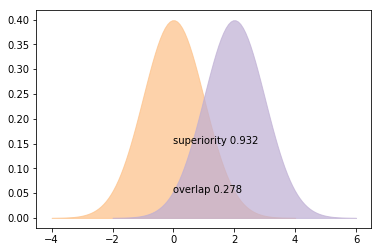

overlap 0.278
superiority 0.932


In [23]:
plot_pdfs(2)

In [24]:
slider = widgets.FloatSlider(min=0, max=4, value=2)
interact(plot_pdfs, cohen_d=slider)
None

interactive(children=(FloatSlider(value=2.0, description='cohen_d', max=4.0), Output()), _dom_classes=('widget…

Cohen's $d$ has a few nice properties:

* Because mean and standard deviation have the same units, their ratio is dimensionless, so we can compare $d$ across different studies.

* In fields that commonly use $d$, people are calibrated to know what values should be considered big, surprising, or important.

* Given $d$ (and the assumption that the distributions are normal), you can compute overlap, superiority, and related statistics.

In summary, the best way to report effect size depends on the audience and your goals. There is often a tradeoff between summary statistics that have good technical properties and statistics that are meaningful to a general audience.


## Cuantificando la precisión

Supongamos que queremos estimar el peso medio de los hombres y mujeres de los EEUU, y queremos *cuantificar* el error o **incertidumbre** de nuestra estimación.

Una aproximación es simular muchos experimentos y ver como los resultados varían.

Comencemos con la subrealista suposición de que conocemos la actual distribución de los pesos de la **población**. Después resolveremos el problema sin asumir lo anterior.

In [25]:
weight = scipy.stats.lognorm(0.23, 0, 70.8)
weight.mean(), weight.std()

(72.69764573296688, 16.944043048498038)

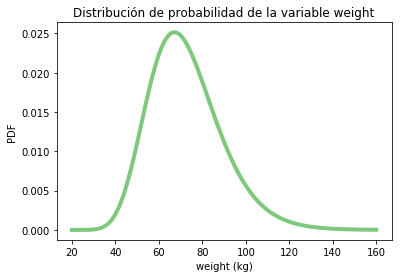

In [26]:
xs = numpy.linspace(20, 160, 100)
ys = weight.pdf(xs)
pyplot.plot(xs, ys, linewidth=4, color=COLOR1)
pyplot.title("Distribución de probabilidad de la variable weight")
pyplot.xlabel('weight (kg)')
pyplot.ylabel('PDF')
pyplot.show()

In [27]:
def make_sample(n=100):
    """
    Función que nos realiza muestreos aleatorios procedentes
    de la distribución.
    """
    sample = weight.rvs(n)
    return sample

In [28]:
sample = make_sample(n=100)
sample.mean(), sample.std()

(70.21181998323988, 16.33924511964658)

Queremos estimar la media del peso de la población, así que el *sample statistic*, que usaremos es la media:

In [29]:
def sample_stat(sample):
    return sample.mean()

Una sola iteración del *experimento* nos da una muestra con 100 registros de mujeres y calcula el peso medio.

Podemos simular este experimento tantas veces como queramos, y recolectar una lista de *estadísticos*:

In [30]:
def compute_sampling_distribution(n=100, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return numpy.array(stats)

La siguiente línea realiza la simulación 1000 veces y guarda los resultados

In [31]:
sample_means = compute_sampling_distribution(n=100, iters=1000)

Echemos un vistazo mediante un gráfica a la distribución. Esta distribución nos muestra cuanto varían los resultado de un experimento a otro.

Recuerda que esta distribución no es la misma que la distribución del peso de la población. Esta distribución es el resultado de repetir los experimentos citados anteriormente.

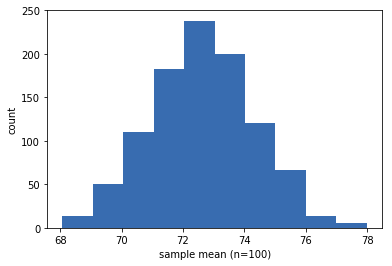

In [32]:
pyplot.hist(sample_means, color=COLOR5)
pyplot.xlabel('sample mean (n=100)')
pyplot.ylabel('count')
pyplot.show()

La media de las muestras es cercana a la media de la población, lo cual está bien, pero no es la parte importante.

La desviación estándar de las muestras cuantifica la variabilidad de un experimento a otro, y refleja la precisión de nuestro estimador.

In [33]:
std_err = sample_means.std()

print("Desviación estándar: " + str(std_err))
print("Media: " + str(sample_means.mean()))

Desviación estándar: 1.6642682254689247
Media: 72.64431495458429


También podemos usar la distribución de las muestras para calcular el *intervalo de confianza del 90%*, el cual contiene el 90% de los resultados:

In [34]:
conf_int = numpy.percentile(sample_means, [5, 95])
print("CI 90%: " + str(conf_int))

CI 90%: [69.90186895 75.39989675]


Ahora podemos ver que ocurre cuando variamos el número de veces que realizamos el experimento, n. La siguiente función coje n, calcula 1000 veces la simulación y nos devuelve un resumen de los resultados:

In [35]:
def plot_sampling_distribution(n, xlim=None):
    """Plot the sampling distribution.
    
    n: sample size
    xlim: [xmin, xmax] range for the x axis 
    """
    sample_stats = compute_sampling_distribution(n, iters=1000)
    se = numpy.std(sample_stats)
    ci = numpy.percentile(sample_stats, [5, 95])
    
    pyplot.hist(sample_stats, color=COLOR2)
    pyplot.xlabel('sample statistic')
    pyplot.xlim(xlim)
    text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
    text(0.03, 0.85, 'SE %0.2f' % se)
    pyplot.show()
    
def text(x, y, s):
    """Plot a string at a given location in axis coordinates.
    
    x: coordinate
    y: coordinate
    s: string
    """
    ax = pyplot.gca()
    pyplot.text(x, y, s,
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

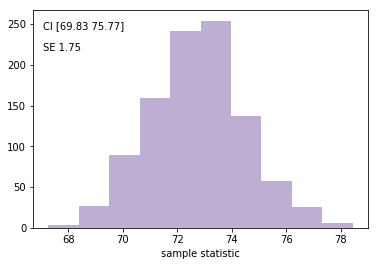

In [36]:
plot_sampling_distribution(100)

Ahora podemos usar `interact` para mostrar los resultados para diferentes números de veces.

In [37]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution, n=slider, xlim=fixed([55, 95]))
None

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

### Otros estadísticos

Este *framework* se puede aplicar a cualquier otro estadístico que queramos trabajar. Simplemente tendremos que cambiar `sample_stat`, y podremos calcular el **error estándar** (SE) y el **intervalo de confianza** (CI) para cualquier estadístico.

**Exercise 1**: Fill in `sample_stat` with any of these statistics:

* Standard deviation of the sample.
* Coefficient of variation, which is the sample standard deviation divided by the sample standard mean.
* Min or Max
* Median (50th percentile)
* 10th o 90th percentile
* Interquartile range (IQR), which is the difference between the 75th percentile and 25th percentiles.

In [38]:
# Compute standard deviation of the sample
def sample_stat(sample):
    return sample.std()

samples = compute_sampling_distribution()

print("Desviación estándar: " + str(samples.std()))
print("Media: " + str(samples.mean()))

Desviación estándar: 1.403085754044951
Media: 16.767201801894625


In [39]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution,
         n=slider, xlim=fixed([0, 50]))
None

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

In [41]:
# Compute min or max
def sample_stat(sample):
    return sample.min()

samples_min = compute_sampling_distribution()

print("Desviación estándar: " + str(samples_min.std()))
print("Media: " + str(samples_min.mean()))

Desviación estándar: 3.9650760816962576
Media: 39.84546000705533


In [42]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution,
         n=slider, xlim=fixed([0, 100]))
None

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

In [43]:
# Compute mediam
def sample_stat(sample):
    return numpy.median(sample)

samples_median = compute_sampling_distribution()

print("Desviación estándar: " + str(samples_median.std()))
print("Media: " + str(samples_median.mean()))

Desviación estándar: 2.014210029612168
Media: 70.77245272058855


In [44]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution,
         n=slider, xlim=fixed([0, 100]))
None

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

In [45]:
# Compute 10th or 90th percentile
def sample_stat(sample):
    return numpy.percentile(sample, q=75) - numpy.percentile(sample, q=25)
samples_percentiles = compute_sampling_distribution()

print("Desviación estándar: " + str(samples_percentiles.std()))
print("Media: " + str(samples_percentiles.mean()))

Desviación estándar: 2.6118533224957363
Media: 21.683638434639928


In [46]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(plot_sampling_distribution,
         n=slider, xlim=fixed([0, 50]))
None

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

### Parte dos

Hasta ahora hemos demostrado que si conocemos la distribucion real de la población, podemos calcular la distribución del muestreo para cualquier estadística de la muestra, y a partir de ahí podemos calcular **SE** y **CI**.

Pero en la vida real no conocemos la distribución real de la población. Si lo hiciéramos, no estaríamos haciendo inferencias estadísticas en todo caso.

En la vida real, usamos la muestra para construir un modelo de la distribución de la población, y luego usamos el modelo para generar la distribución del muestreo. Una manera sencilla y popular de hacerlo es *remuestreando*, lo que significa que usamos la muestra misma como modelo de la distribución de la población y tomamos muestras de ella.

Previamente vamos a organizar el código en una clase.

In [47]:
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = numpy.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return numpy.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = numpy.percentile(sample_stats, [5, 95])
    
        pyplot.hist(sample_stats, color=COLOR2)
        pyplot.xlabel('sample statistic')
        pyplot.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)
        pyplot.show()

In [48]:
def interact_func(n, xlim):
    sample = weight.rvs(n)
    resampler = Resampler(sample, xlim=xlim)
    resampler.plot_sampling_distribution()

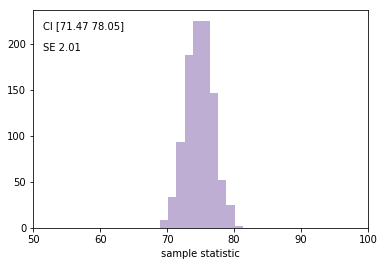

In [49]:
interact_func(n=100, xlim=[50, 100])

Ahora podemos usar `interact_func` en una iteración:

In [50]:
slider = widgets.IntSlider(min=10, max=1000, value=100)
interact(interact_func, n=slider, xlim=fixed([50, 100]))
None

interactive(children=(IntSlider(value=100, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

**Exercise 2**: write a new class called `StdResampler` that inherits from `Resampler` and overrides `sample_stat` so it computes the standard deviation of the resampled data.